In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Reducing the architecture size of the model or increasing the architecture size of the model

In [3]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
def vectorize_sequences(sequences,max_length=10000):
    vectorized_sequences_matrix = np.zeros((len(sequences),max_length))
    for i,sentence in enumerate(sequences):
        for tokenized_words in sentence:
            vectorized_sequences_matrix[i,tokenized_words] = 1
    return vectorized_sequences_matrix

In [6]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [8]:
from keras import Sequential
from keras.layers import Dense

In [9]:
model = Sequential([
    Dense(units=16,activation="relu"),
    Dense(units=16,activation="relu"),
    Dense(units=1,activation="sigmoid")
])

In [13]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop",metrics=["accuracy"])

In [14]:
history_original = model.fit(X_train,train_labels,epochs=20,batch_size=512,validation_split=0.4)
history_original

Epoch 1/20
30/30 [==============================] - 5s 60ms/step - loss: 0.5373 - accuracy: 0.7833 - val_loss: 0.4279 - val_accuracy: 0.8525
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3303 - accuracy: 0.9002 - val_loss: 0.3146 - val_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2391 - accuracy: 0.9240 - val_loss: 0.2803 - val_accuracy: 0.8934
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1845 - accuracy: 0.9419 - val_loss: 0.2823 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1514 - accuracy: 0.9513 - val_loss: 0.2783 - val_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1253 - accuracy: 0.9617 - val_loss: 0.2877 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1062 - accuracy: 0.9684 - val_loss: 0.3027 - val_accuracy: 0.8872
Epoch 8/20
30

In [15]:
model1 = Sequential([
    Dense(units=4,activation="relu"),
    Dense(units=4,activation="relu"),
    Dense(units=1,activation="sigmoid")
])

In [16]:
model1.compile(loss="binary_crossentropy", optimizer="rmsprop",metrics=["accuracy"])

In [17]:
history_smaller_model = model1.fit(X_train,train_labels,epochs=20,batch_size=512,validation_split=0.4)
history_smaller_model

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5969 - accuracy: 0.7577 - val_loss: 0.5095 - val_accuracy: 0.8470
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4476 - accuracy: 0.8779 - val_loss: 0.4190 - val_accuracy: 0.8720
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3598 - accuracy: 0.9004 - val_loss: 0.3623 - val_accuracy: 0.8810
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2986 - accuracy: 0.9140 - val_loss: 0.3246 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2545 - accuracy: 0.9254 - val_loss: 0.2998 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2209 - accuracy: 0.9332 - val_loss: 0.2841 - val_accuracy: 0.8903
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1946 - accuracy: 0.9410 - val_loss: 0.2763 - val_accuracy: 0.8922
Epoch 8/20
30

In [19]:
history_original_dict = history_original.history
history_smaller_model_dict = history_smaller_model.history

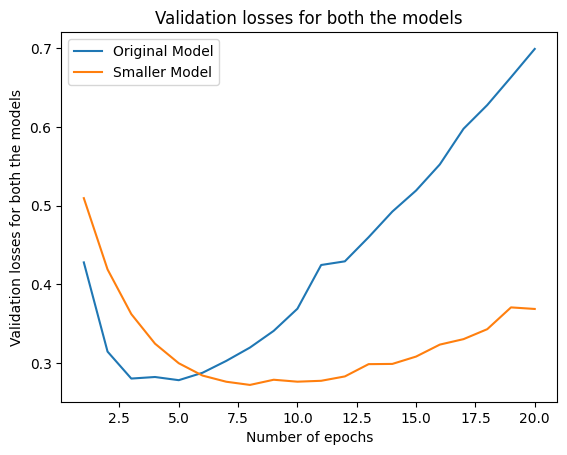

In [26]:
#Comparison between smaller and original model validation losses
epochs = range(1,len(history_original_dict["loss"])+1)

plt.plot(epochs,history_original_dict["val_loss"],label="Original Model")
plt.plot(epochs,history_smaller_model_dict["val_loss"],label="Smaller Model")

plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Validation losses for both the models")

plt.title("Validation losses for both the models")

plt.show()


In [22]:
model2 = Sequential([
    Dense(units=512,activation="relu"),
    Dense(units=512,activation="relu"),
    Dense(units=1,activation="sigmoid")
])

In [23]:
model2.compile(loss="binary_crossentropy", optimizer="rmsprop",metrics=["accuracy"])

In [24]:
history_larger_model = model2.fit(X_train,train_labels,epochs=20,batch_size=512,validation_split=0.4)
history_larger_model

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5490 - accuracy: 0.7653 - val_loss: 0.3455 - val_accuracy: 0.8556
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2418 - accuracy: 0.9041 - val_loss: 0.3305 - val_accuracy: 0.8565
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1488 - accuracy: 0.9429 - val_loss: 0.2794 - val_accuracy: 0.8935
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0681 - accuracy: 0.9767 - val_loss: 0.4356 - val_accuracy: 0.8822
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1472 - accuracy: 0.9753 - val_loss: 0.3449 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0055 - accuracy: 0.9995 - val_loss: 0.5022 - val_accuracy: 0.8891
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - loss: 9.4233e-04 - accuracy: 0.9999 - val_loss: 0.6342 - val_accuracy: 0.8882
Epoch 8/2

In [25]:
history_larger_model_dict = history_larger_model.history

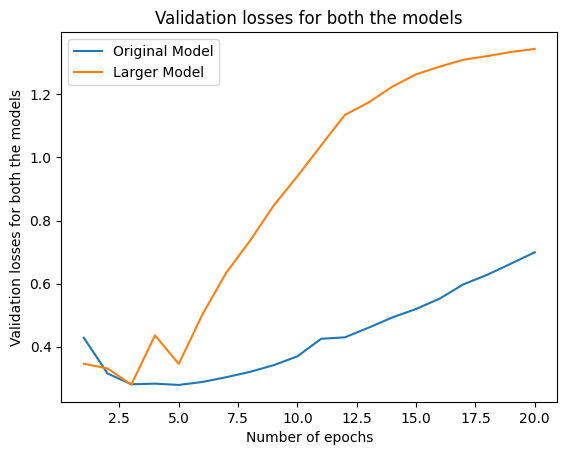

In [27]:
#Comparison between larger and original model validation losses
epochs = range(1,len(history_original_dict["loss"])+1)

plt.plot(epochs,history_original_dict["val_loss"],label="Original Model")
plt.plot(epochs,history_larger_model_dict["val_loss"],label="Larger Model")

plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Validation losses for both the models")

plt.title("Validation losses for both the models")

plt.show()


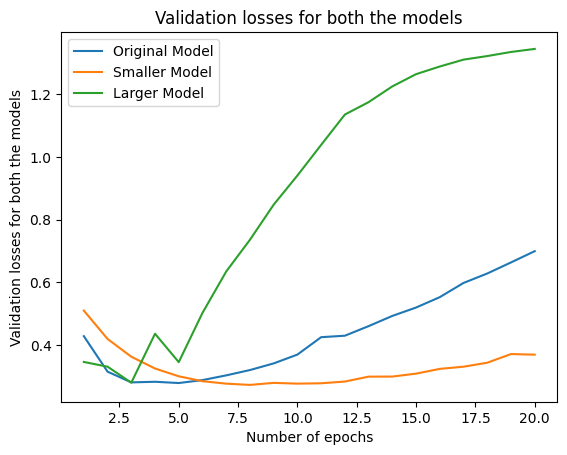

In [28]:
# Comparison between all the 3 models

epochs = range(1,len(history_original_dict["loss"])+1)

plt.plot(epochs,history_original_dict["val_loss"],label="Original Model")
plt.plot(epochs,history_smaller_model_dict["val_loss"],label="Smaller Model")
plt.plot(epochs,history_larger_model_dict["val_loss"],label="Larger Model")

plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Validation losses for both the models")

plt.title("Validation losses for both the models")

plt.show()


In [29]:
# The smaller the model, the more time it takes to reach overfitting stage and  performance degrades more slowly after overfitting stage
# The larger the model, the faster it reaches overfitting and performance degrades more rapidly after overfitting stage

# So the key is to find the appropriate model (not too large or small) for our problem statement, and train it till it overfits , then the epochs just before overfitting is the stage where model
# performance is high

In [31]:
# Adding weight regularization (L1 and L2)

In [32]:
from keras import regularizers

In [34]:
model4 = Sequential([
    Dense(units=16,activation="relu",kernel_regularizer=regularizers.l2(0.002)), # Applying L2 regularization
    Dense(units=16,activation="relu",kernel_regularizer=regularizers.l1(0.002)), # Applying L1 regularization
    Dense(units=1,activation="sigmoid")
])

In [35]:
model4.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [37]:
history_regularization = model4.fit(X_train,train_labels,epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.6632 - accuracy: 0.7815 - val_loss: 0.5509 - val_accuracy: 0.8473
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4641 - accuracy: 0.8985 - val_loss: 0.4551 - val_accuracy: 0.8892
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3992 - accuracy: 0.9179 - val_loss: 0.4677 - val_accuracy: 0.8697
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3667 - accuracy: 0.9249 - val_loss: 0.4341 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3483 - accuracy: 0.9317 - val_loss: 0.4255 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3294 - accuracy: 0.9387 - val_loss: 0.4450 - val_accuracy: 0.8783
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3158 - accuracy: 0.9420 - val_loss: 0.4289 - val_accuracy: 0.8865
Epoch 8/20
30

In [39]:
history_regularization_dict = history_regularization.history

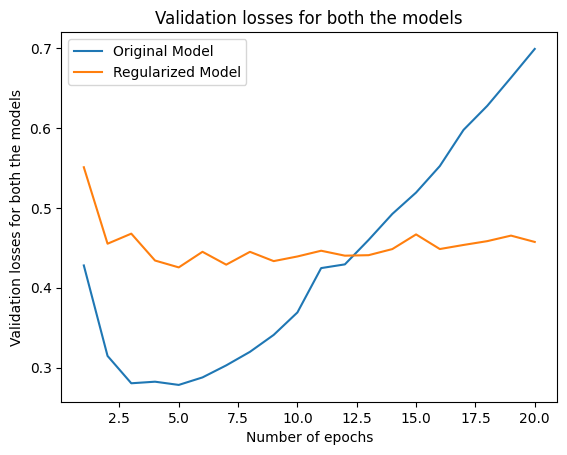

In [40]:
# Comparison between original and regularized model

epochs = range(1,len(history_original_dict["loss"])+1)

plt.plot(epochs,history_original_dict["val_loss"],label="Original Model")
plt.plot(epochs,history_regularization_dict["val_loss"],label="Regularized Model")

plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Validation losses for both the models")

plt.title("Validation losses for both the models")

plt.show()

In [41]:
# Regularized model tends to be more resistant to overfitting
# These weight regularizations only work for smaller models (not much impact on deep neural networks)

In [42]:
# Adding dropout regularization

In [43]:
from keras.layers import Dropout

In [47]:
# Dropout = 0.5 : Dropipping 50 percent of the output of a layer ([0.1,0.5,3.4,1.3,5.6,7.6]) ---> output of a layer , randomly 50 percent of the outputs will convert to 0.0
# Then 2 steps can be done 
# The output of the layer during training can then be scaled up by 0.5   i.e output * 2   or during testing, we can scale down the output i.e output / 2

In [44]:
model5 = Sequential([
    Dense(units=16,activation="relu"),
    Dropout(0.5),
    Dense(units=16,activation="relu"),
    Dropout(0.5),
    Dense(units=1,activation="sigmoid")
])

In [45]:
model5.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [46]:
history_dropout = model5.fit(X_train,train_labels,epochs=20,validation_split=0.4,batch_size=512)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.6335 - accuracy: 0.6393 - val_loss: 0.5351 - val_accuracy: 0.8462
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5131 - accuracy: 0.7635 - val_loss: 0.4103 - val_accuracy: 0.8694
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4137 - accuracy: 0.8300 - val_loss: 0.3304 - val_accuracy: 0.8810
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3530 - accuracy: 0.8657 - val_loss: 0.2989 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3010 - accuracy: 0.8930 - val_loss: 0.2833 - val_accuracy: 0.8913
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2621 - accuracy: 0.9077 - val_loss: 0.2730 - val_accuracy: 0.8907
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2321 - accuracy: 0.9256 - val_loss: 0.2818 - val_accuracy: 0.8922
Epoch 8/20
30

In [48]:
history_dropout_dict = history_dropout.history

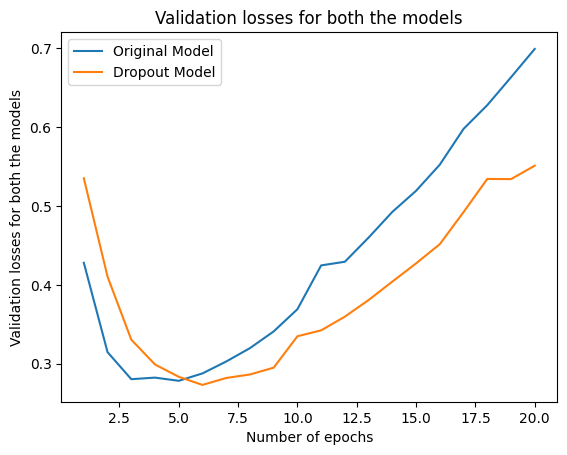

In [49]:
# Comparison between original and dropout model

epochs = range(1,len(history_original_dict["loss"])+1)

plt.plot(epochs,history_original_dict["val_loss"],label="Original Model")
plt.plot(epochs,history_dropout_dict["val_loss"],label="Dropout Model")

plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Validation losses for both the models")

plt.title("Validation losses for both the models")

plt.show()

In [50]:
#  The lowest validation loss if lower in dropout model than in original model although it took more epochs to reach there
# Here the dropout model has better generalization than original model